In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('D:/data/Churn/customer_churn_dataset-training-master.csv')

In [3]:
df = df.drop('CustomerID',axis=1)

In [4]:
df.drop(index=199295,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [6]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
gender = lambda x: 1 if x == 'Female' else 0

In [8]:
df['Gender'] = df['Gender'].apply(gender)

In [9]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,1,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,1,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,1,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,0,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,0,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,0,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,1,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,0,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,0,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [10]:
df['Subscription Type'] = df['Subscription Type'].replace({'Standard':0, 'Basic':1, 'Premium':2})

C:\Users\hp\AppData\Local\Temp\ipykernel_13600\1444200598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subscription Type'] = df['Subscription Type'].replace({'Standard':0, 'Basic':1, 'Premium':2})


In [11]:
encoder = preprocessing.OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encoded = encoder.fit_transform(df[['Contract Length']])
df = df.join(encoded)

In [12]:
df.drop('Contract Length',axis=1,inplace=True)

In [13]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,1,39.0,14.0,5.0,18.0,0,932.00,17.0,1.0,1.0,0.0,0.0
1,65.0,1,49.0,1.0,10.0,8.0,1,557.00,6.0,1.0,0.0,1.0,0.0
2,55.0,1,14.0,4.0,6.0,18.0,1,185.00,3.0,1.0,0.0,0.0,1.0
3,58.0,0,38.0,21.0,7.0,7.0,0,396.00,29.0,1.0,0.0,1.0,0.0
4,23.0,0,32.0,20.0,5.0,8.0,1,617.00,20.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,0,54.0,15.0,1.0,3.0,2,716.38,8.0,0.0,1.0,0.0,0.0
440829,25.0,1,8.0,13.0,1.0,20.0,2,745.38,2.0,0.0,1.0,0.0,0.0
440830,26.0,0,35.0,27.0,1.0,5.0,0,977.31,9.0,0.0,0.0,0.0,1.0
440831,28.0,0,55.0,14.0,2.0,0.0,0,602.55,2.0,0.0,0.0,0.0,1.0


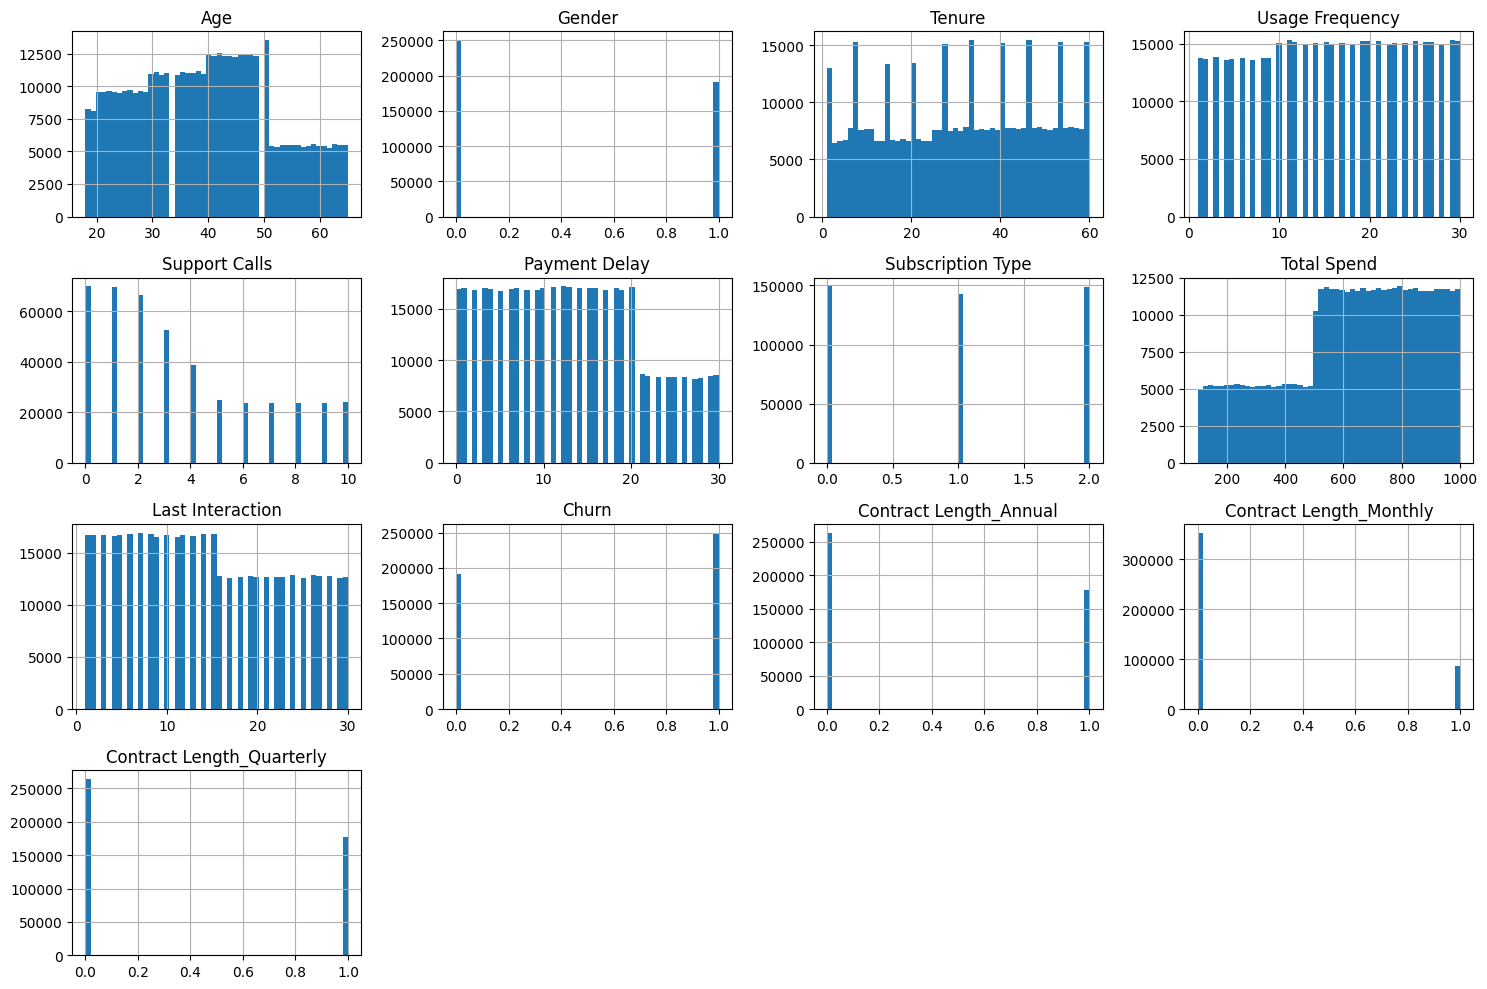

In [14]:
df.hist(bins=50,figsize=(15,10))
plt.tight_layout()

In [15]:
df.corr()['Churn'].sort_values(ascending=False)

Churn                        1.000000
Support Calls                0.574267
Contract Length_Monthly      0.433553
Payment Delay                0.312129
Age                          0.218394
Gender                       0.175395
Last Interaction             0.149616
Subscription Type           -0.001046
Usage Frequency             -0.046101
Tenure                      -0.051919
Contract Length_Annual      -0.175965
Contract Length_Quarterly   -0.176244
Total Spend                 -0.429355
Name: Churn, dtype: float64

<Axes: >

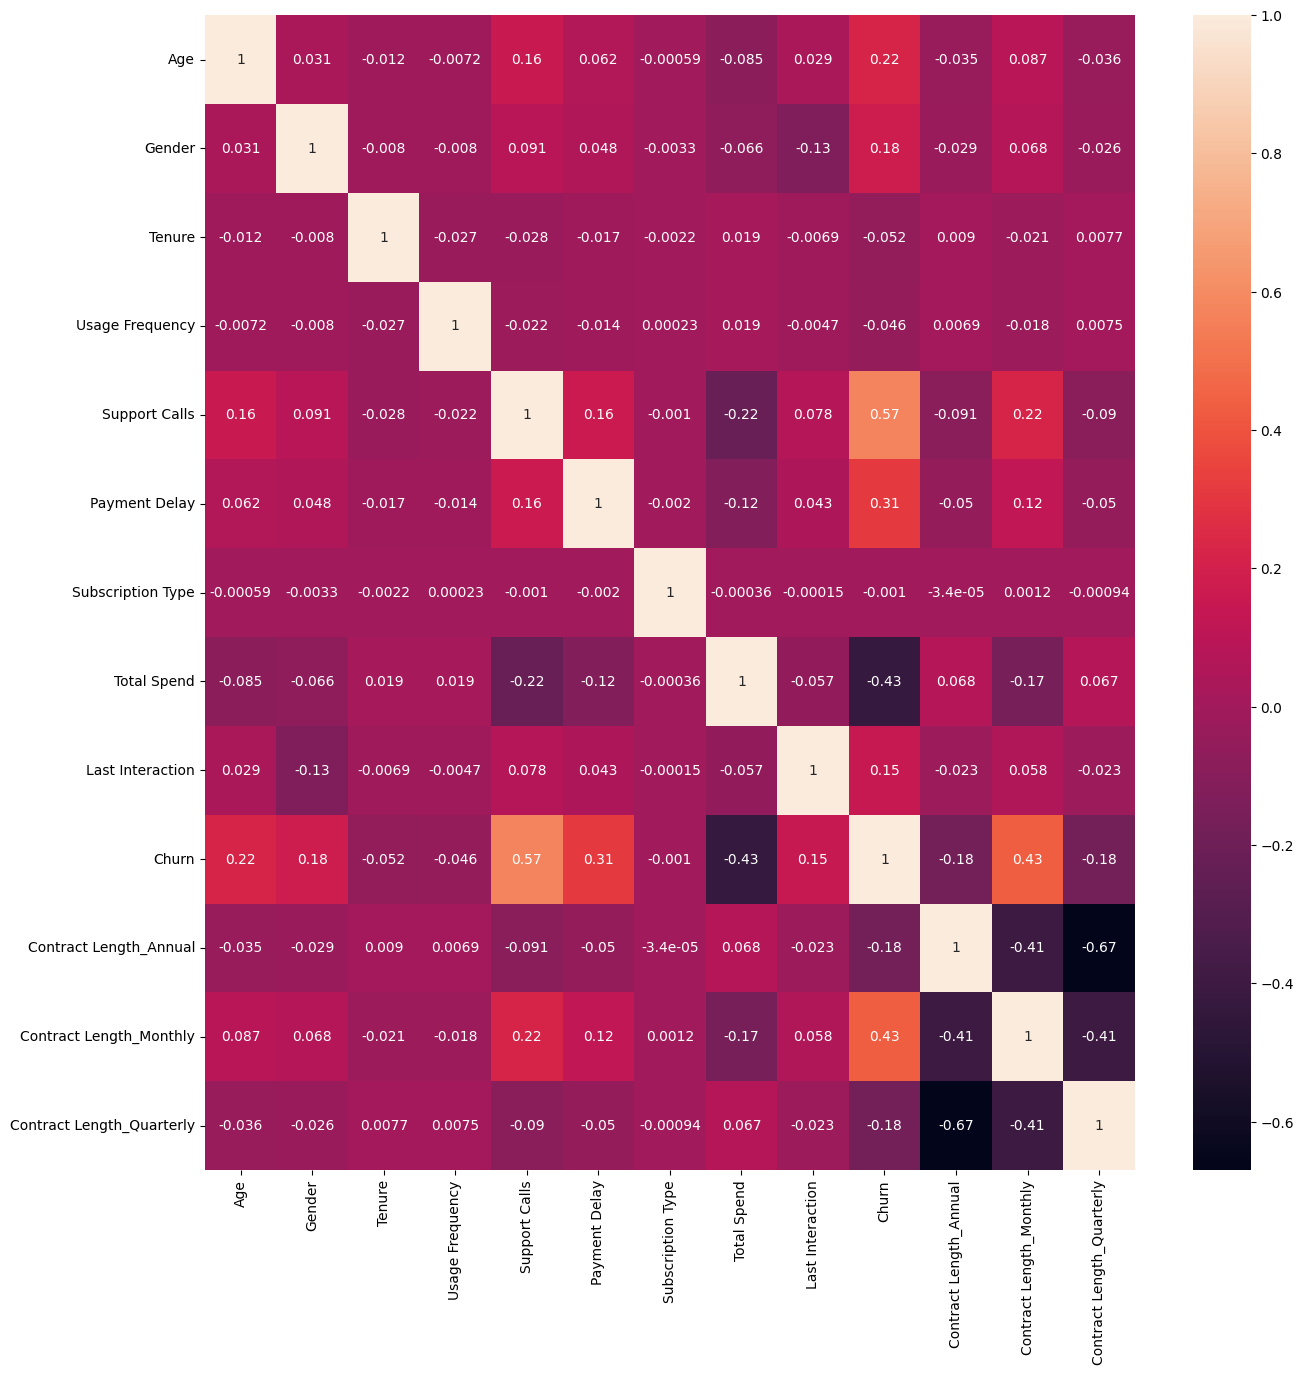

In [16]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [17]:
df.drop(['Tenure','Usage Frequency','Subscription Type','Churn'],axis=1)

,Age,Gender,Support Calls,Payment Delay,Total Spend,Last Interaction,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,1,5.0,18.0,932.00,17.0,1.0,0.0,0.0
1,65.0,1,10.0,8.0,557.00,6.0,0.0,1.0,0.0
2,55.0,1,6.0,18.0,185.00,3.0,0.0,0.0,1.0
3,58.0,0,7.0,7.0,396.00,29.0,0.0,1.0,0.0
4,23.0,0,5.0,8.0,617.00,20.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
440828,42.0,0,1.0,3.0,716.38,8.0,1.0,0.0,0.0
440829,25.0,1,1.0,20.0,745.38,2.0,1.0,0.0,0.0
440830,26.0,0,1.0,5.0,977.31,9.0,0.0,0.0,1.0
440831,28.0,0,2.0,0.0,602.55,2.0,0.0,0.0,1.0


In [18]:
X = np.array(df.drop(['Tenure','Usage Frequency','Subscription Type','Churn'],axis=1))
y = np.array(df['Churn'])

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=4)

Scaler = preprocessing.StandardScaler()
Xtrain_scaled = Scaler.fit_transform(Xtrain)
Xtest_scaled = Scaler.fit_transform(Xtest)

model = KNeighborsClassifier(n_neighbors=4,weights='distance',algorithm='kd_tree')#4
model.fit(Xtrain_scaled,ytrain)

pred = model.predict(Xtest_scaled)
metrics.f1_score(pred,ytest)

np.float64(0.9838057090706283)

In [87]:
ytrain_pred = model.predict(Xtrain_scaled)

# 4. پیش‌بینی روی داده‌های تست
ytest_pred = model.predict(Xtest_scaled)

In [89]:
train_f1 = metrics.f1_score(ytrain, ytrain_pred, average='macro')

test_f1 = metrics.f1_score(ytest, ytest_pred, average='macro')
print(train_f1)
print(test_f1)

0.9880981526376658
0.9808039456912627


In [18]:
# تعریف مدل KNN
knn = KNeighborsClassifier()

# تعریف پارامترهای قابل تست (در اینجا مقدارهای مختلف k)
param_grid = {
    'n_neighbors': list(range(1, 10)),  # بررسی مقادیر k از 1 تا 30
    'weights': ['uniform', 'distance'],  # بررسی دو نوع وزن‌دهی
}

# استفاده از GridSearchCV برای پیدا کردن بهترین k
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(Xtrain_scaled, ytrain)

# بهترین مقدار k
best_k = grid_search.best_params_['n_neighbors']
print(f"بهترین مقدار k: {best_k}")


C:\Users\hp\miniconda3\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


بهترین مقدار k: 4


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)  # کاهش ابعاد به 10 ویژگی
X_train_pca = pca.fit_transform(Xtrain_scaled)
X_test_pca = pca.transform(Xtest_scaled)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca, ytrain)


KNeighborsClassifier(n_neighbors=4)

In [44]:
pred2 = knn.predict(X_test_pca)
metrics.f1_score(pred2,ytest)

np.float64(0.979047657907622)

In [83]:
# استفاده از 5-Fold Cross Validation 
# معیار ارزیابی MAE (Mean Absolute Error) است
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# تبدیل مقادیر به مثبت (چون MAE همیشه مثبت است)
scores = -scores
 # نمایش نتایج 
print(f'MAE for each fold: {scores}') 
print(f'Mean MAE: {scores.mean()}')


MAE for each fold: [0.07017365 0.07027573 0.06966404 0.0693578  0.07105914]
Mean MAE: 0.0701060716163272


In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
acc_list = np.zeros(Ks-1)

for i in range(1, Ks):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(Xtrain_scaled, ytrain)
    
    # پیش‌بینی روی داده‌های تست
    pred = model.predict(Xtest_scaled)
    
    # محاسبه‌ی F1-Score (با استفاده از ترتیب درست آرگومان‌ها)
    acc_list[i-1] = metrics.f1_score(ytest, pred, average='weighted')  # یا 'macro' برای داده‌های متوازن

# نمایش لیست F1-Scores
print(acc_list)


[0.97998258 0.97822027 0.9811089  0.97676414 0.97955236 0.97621096
 0.97798298 0.97550003 0.97706885]


<Axes: >

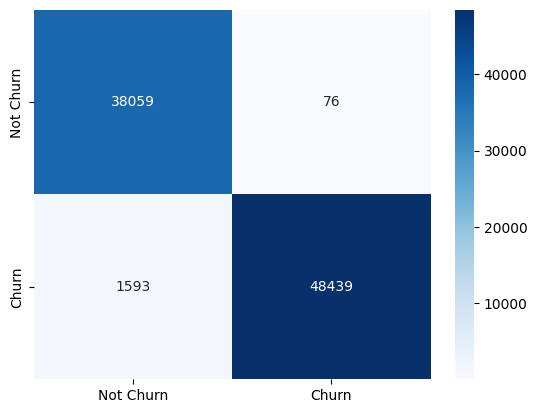

In [26]:
cm = metrics.confusion_matrix(ytest, pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

In [27]:
metrics.precision_score(ytest, pred)

np.float64(0.9984334741832422)

In [28]:
metrics.recall_score(ytest, pred)

np.float64(0.9681603773584906)

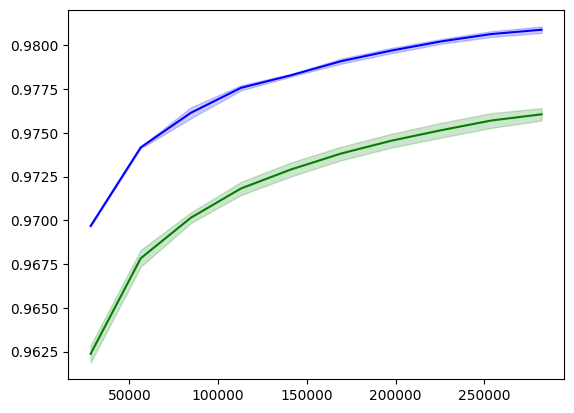

In [47]:
train_sizes, train_scores, test_scores = learning_curve(knn, Xtrain_scaled, ytrain, 
                                                        scoring='accuracy', n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
# محاسبه میانگین و انحراف معیار برای هر بخش از داده‌ها
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# رسم نمودار منحنی یادگیری
plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Testing accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)